In [2]:
from Instance import *
from pyvis.network import Network
import networkx as nx
import numpy as np
import time
import random
from matplotlib.animation import FuncAnimation

In [14]:
class NetworkModel():
    def __init__(self, hostMutMatrix, fitnessParams, viralMutMatrix, infectMatrix):
        self.hostMutationAdjacencyMatrix = hostMutMatrix
        self.viralMutationAdjacencyMatrix = viralMutMatrix
        self.infectionMatrix = infectMatrix
        self.fitnessParameters = fitnessParams
        self.instances = []

        self.networkParameters = {"Host Mutation Matrix" : self.hostMutationAdjacencyMatrix,
                             "Viral Mutation Matrix" : self.viralMutationAdjacencyMatrix,
                             "Infection Matrix" : self.infectionMatrix}

        self.nxRepresentation = self.initializeNetworkXRepresentation()

        self.loadedTimeSeries = [[], [], []]
        
        self.frameScalingFactor = 100
        self.figure, self.axis = plt.subplots()


    def initializeNetworkXRepresentation(self):
        networkGraph = nx.from_numpy_array(self.hostMutationAdjacencyMatrix)
        nodePositions = nx.spring_layout(networkGraph)
        return [networkGraph, nodePositions]
        
    
    def createInstance(self, initialHostPopulationValues, initialPhagePopulationValues, carryingCapacity, lysisQuantities, numIters):
        self.instances.append(Instance(initialHostPopulationValues, initialPhagePopulationValues, carryingCapacity, self.fitnessParameters,
                                       lysisQuantities, self.hostMutationAdjacencyMatrix, self.infectionMatrix, self.viralMutationAdjacencyMatrix,
                                       numIters))

    def runInstance(self, instanceIndex):
        self.instances[instanceIndex].runAlgorithm()
    
    def getNetworkParameter(self, networkParameter):
        return self.networkParameters[networkParameter]

    '''def displayModel(self):
        colorMap = [(0.5, 0.5, 0), (0.5, 0.5, 0), (0.5, 0.5, 0)]
        nodes = nx.draw_networkx_nodes(self.nxRepresentation[0], pos = self.nxRepresentation[1], node_color = colorMap)
        edges = nx.draw_networkx_edges(self.nxRepresentation[0], pos = self.nxRepresentation[1])
        
        return nodes,'''
        
    def displayFrame(self, frame):
        populationVals = self.loadedTimeSeries[1][:, self.frameScalingFactor * frame]
        colorMap = self.getColorsFromPops(populationVals)
        self.axis.clear()
        nx.draw(self.nxRepresentation[0], self.nxRepresentation[1], with_labels = True, node_color = colorMap, ax = self.axis)

    def getColorsFromPops(self, populationValues):
        carryingCapacity = self.loadedTimeSeries[2]
        colorMap = []
        for j in range(len(populationValues)):
            #colorMap.append((0.5, 0.5, populationValues[j] / carryingCapacity))
            colorMap.append((random.random(), random.random(), random.random()))
        #print("The Color Map is presently {}".format(colorMap))
        return colorMap
            
    def getInstance(self, instanceIndex):
        return self.instances[instanceIndex]

    def saveModel(self):
        return 0

    def loadModel(self):
        return 0

    def loadInstance(self, instanceIndex):
        self.loadedTimeSeries[0] = self.getInstance(instanceIndex).timeValues
        self.loadedTimeSeries[1] = self.getInstance(instanceIndex).hostPopulationValues
        self.loadedTimeSeries[2] = self.getInstance(instanceIndex).carryingCapacity
        
    def animateInstance(self, instanceIndex):
        rate = 1000
        numIterations = len(self.loadedTimeSeries[0])
        print("Number of Raw Frames = {}".format(numIterations))
        numFrames = int(numIterations / self.frameScalingFactor)
        print("Cropped Number of Frames: {}".format(numFrames))
        ani = FuncAnimation(self.figure, self.displayFrame, frames = numFrames,
                    interval = rate, blit=True)

        #ani.save('basic_animation.mp4', fps=30)

        plt.show()
        


Testing createInstance()


Information for Host Population 0
-----------------------------
Population Level: 1000
Fitness Parameter: 0.5
Would-be Exponential Growth Rate: 500.0
Logistic Growth Rate: 450.0
Timer Value: 0.0005441812761660352

Information for Host Population 1
-----------------------------
Population Level: 0
Fitness Parameter: 0.5
Would-be Exponential Growth Rate: 0.0
Logistic Growth Rate: 0.0
Timer Value: inf

Information for Host Population 2
-----------------------------
Population Level: 0
Fitness Parameter: 0.5
Would-be Exponential Growth Rate: 0.0
Logistic Growth Rate: 0.0
Timer Value: inf

Information for Phage Population 0
-----------------------------
Population Level: 1
Burst Size: 2
Lysis Time: 10
Timer Value: 10.219

Information for Phage Population 1
-----------------------------
Population Level: 0
Burst Size: 2
Lysis Time: 10
Timer Value: inf

Information for Phage Population 2
-----------------------------
Population Level: 0
Burst Size: 2
Lysis Time: 10

RuntimeError: The animation function must return a sequence of Artist objects.

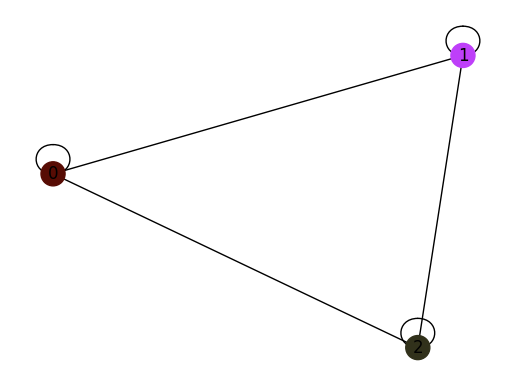

In [15]:
#Test suite
hostMutationMatrix = np.zeros((3, 3))
hostMutationMatrix[0, 0] = 0.98
hostMutationMatrix[0, 1] = 0.01
hostMutationMatrix[0, 2] = 0.01
hostMutationMatrix[1, 0] = 0.01
hostMutationMatrix[1, 1] = 0.98
hostMutationMatrix[1, 2] = 0.01
hostMutationMatrix[2, 0] = 0.01
hostMutationMatrix[2, 1] = 0.01
hostMutationMatrix[2, 2] = 0.98

phageHostInfectionMatrix = np.zeros((3, 3))
phageHostInfectionMatrix[0, 0] = 1
phageHostInfectionMatrix[0, 1] = 0
phageHostInfectionMatrix[0, 2] = 0
phageHostInfectionMatrix[1, 0] = 0
phageHostInfectionMatrix[1, 1] = 1
phageHostInfectionMatrix[1, 2] = 0
phageHostInfectionMatrix[2, 0] = 0
phageHostInfectionMatrix[2, 1] = 0
phageHostInfectionMatrix[2, 2] = 1

phageMutationMatrix = np.zeros((3, 3))
phageMutationMatrix[0, 0] = 0.998
phageMutationMatrix[0, 1] = 0.001
phageMutationMatrix[0, 2] = 0.001
phageMutationMatrix[1, 0] = 0.001
phageMutationMatrix[1, 1] = 0.998
phageMutationMatrix[1, 2] = 0.001
phageMutationMatrix[2, 0] = 0.001
phageMutationMatrix[2, 1] = 0.001
phageMutationMatrix[2, 2] = 0.998

burstSize = 2
lysisLength = 10
lysisQuantities = [burstSize, lysisLength]

carryingCapacity = 10000
numIters = 10000

netTest = NetworkModel(hostMutationMatrix, [0.5, 0.5, 0.5], phageHostInfectionMatrix, phageMutationMatrix)

print("\nTesting createInstance()\n")
netTest.createInstance([1000, 0, 0], [1, 0, 0], carryingCapacity, lysisQuantities, numIters)

for inst in netTest.instances:
    inst.allPopsReportForDuty()

print("\nTesting runInstance()\n")
netTest.runInstance(0)

for inst in netTest.instances:
    inst.allPopsReportForDuty()

print("\nTesting initializeNetworkXRepresentation\n")
netTest.initializeNetworkXRepresentation()

print("\nTesting displayModel()\n")
#netTest.displayModel()

print("\nTesting loadInstance()\n")
netTest.loadInstance(0)

print(netTest.loadedTimeSeries)

print("\nTesting displayIteration()\n")
#netTest.displayIteration(10000)

print("\n Testing animation methodology\n")
netTest.animateInstance(0)